<a href="https://colab.research.google.com/github/junwoochoi33/NLPPractice/blob/main/nlp_01_practice_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. DNN

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 1. 데이터 로딩 (MNIST 손글씨 이미지)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 정규화 (0~255 → 0~1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. 레이블을 원-핫 인코딩 (예: 3 → [0,0,0,1,0,0,0,0,0,0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 4. DNN 모델 정의
model = Sequential([
    Flatten(input_shape=(28, 28)),       # 28x28 이미지를 784 차원 벡터로 변환
    Dense(128, activation='relu'),       # 첫 번째 은닉층 (ReLU 활성화)
    Dense(64, activation='relu'),        # 두 번째 은닉층
    Dense(10, activation='softmax')      # 출력층 (10개 클래스 확률로 출력)
])

# 5. 모델 컴파일 (학습 방법 설정)
model.compile(optimizer='adam',                 # 최적화 알고리즘
              loss='categorical_crossentropy',  # 다중 클래스 분류용 손실 함수
              metrics=['accuracy'])             # 평가 지표: 정확도

# 6. 모델 학습
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# 7. 테스트 데이터로 평가
loss, acc = model.evaluate(x_test, y_test)
print(f"테스트 정확도: {acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8602 - loss: 0.4672 - val_accuracy: 0.9607 - val_loss: 0.1306
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9641 - loss: 0.1182 - val_accuracy: 0.9664 - val_loss: 0.1089
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9775 - loss: 0.0729 - val_accuracy: 0.9703 - val_loss: 0.1043
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9822 - loss: 0.0571 - val_accuracy: 0.9715 - val_loss: 0.0986
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9866 - loss: 0.0424 - val_accuracy: 0.9684 - val_loss: 0.1123
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9632 - loss: 0.1243
테스트 정확도: 0.9694


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

## 2. 임베딩 시각화

In [4]:
# 1. NumPy 버전을 안정된 것으로 재설치
!pip install numpy==1.23.5 --force-reinstall

# 2. gensim도 재설치 (순서 중요!)
!pip install gensim --force-reinstall


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 93.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompati

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
^C


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


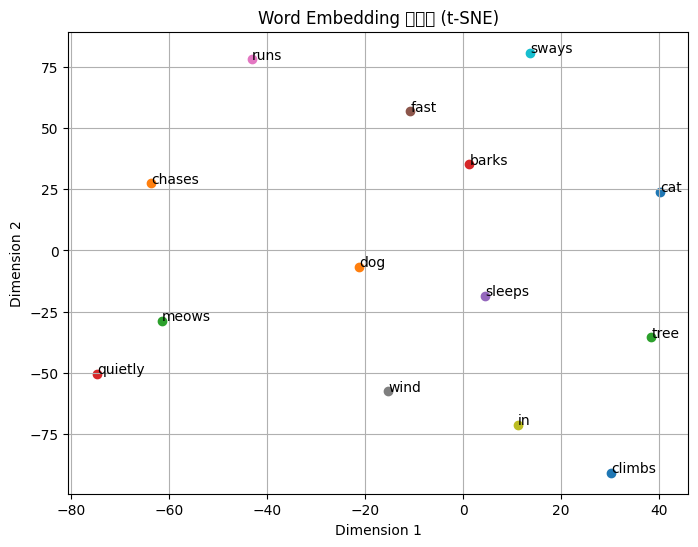

In [4]:
# 필요한 라이브러리 불러오기
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np

# 샘플 말뭉치
sentences = [
    ['dog', 'barks'],
    ['cat', 'meows'],
    ['dog', 'chases', 'cat'],
    ['cat', 'climbs', 'tree'],
    ['tree', 'sways', 'in', 'wind'],
    ['dog', 'runs', 'fast'],
    ['cat', 'sleeps', 'quietly']
]

# Word2Vec 모델 학습
model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, workers=1, sg=0)

# 단어 목록 추출
words = list(model.wv.index_to_key)

# 각 단어의 임베딩 벡터 추출
word_vectors = np.array([model.wv[word] for word in words])

# 차원 축소: t-SNE를 이용해 50차원을 2차원으로 줄임
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
word_vectors_2d = tsne.fit_transform(word_vectors)

# 시각화
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    x, y = word_vectors_2d[i]
    plt.scatter(x, y)
    plt.text(x + 0.05, y + 0.05, word, fontsize=10)

plt.title("Word Embedding 시각화 (t-SNE)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()
